# COT Reports 

Looking to make a data pipeline using CFTC API of downloading COT reports and feeding it into either CSV files or MySQL. This can be used to make a host dashboards using PowerBI to display the latest information.

In [26]:
# Importing Libraries

import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import cycler
import numpy as np
import cot_reports as cot


In [27]:
# Dark Mode

def plt_dark():
       colors = cycler('color',
                     ['#669FEE', '#66EE91', '#9988DD',
                     '#EECC55', '#88BB44', '#FFBBBB'])
       plt.rc('figure', facecolor='#313233')
       plt.rc('axes', facecolor="#313233", edgecolor='none',
              axisbelow=True, grid=True, prop_cycle=colors,
              labelcolor='gray')
       plt.rc('grid', color='474A4A', linestyle='solid')
       plt.rc('xtick', color='gray')
       plt.rc('ytick', direction='out', color='gray')
       plt.rc('legend', facecolor="#313233", edgecolor="#313233")
       plt.rc("text", color="#C9C9C9")
       plt.rc('figure', facecolor='#313233')
       
plt.style.use('dark_background')

In [28]:

df = cot.cot_year(year = 2024, cot_report_type = 'legacy_fut')


Selected: legacy_fut
Downloaded single year data from: 2024
Stored the file annual.txt in the working directory.


In [29]:
# Cleaning txt file for the information required
filtered_df = df[["Market and Exchange Names", "As of Date in Form YYYY-MM-DD", 
                  "Noncommercial Positions-Long (All)", "Noncommercial Positions-Short (All)", 
                  "Nonreportable Positions-Long (All)","Nonreportable Positions-Short (All)", 
                  "Change in Noncommercial-Long (All)", "Change in Noncommercial-Short (All)",
                  "Change in Nonreportable-Long (All)","Change in Nonreportable-Short (All)", 
                  "% of OI-Noncommercial-Long (All)","% of OI-Noncommercial-Short (All)",
                  "% of OI-Nonreportable-Long (All)","% of OI-Nonreportable-Short (All)"]]

# General Futures data
filtered_df_futures = filtered_df[filtered_df["Market and Exchange Names"].isin(["E-MINI S&P 500 - CHICAGO MERCANTILE EXCHANGE", "NASDAQ MINI - CHICAGO MERCANTILE EXCHANGE"])]

# Creating Variables for different futures instruments
Es_mini = filtered_df_futures[filtered_df_futures["Market and Exchange Names"]== "E-MINI S&P 500 - CHICAGO MERCANTILE EXCHANGE"]
Nq_mini = filtered_df_futures[filtered_df_futures["Market and Exchange Names"]== "NASDAQ MINI - CHICAGO MERCANTILE EXCHANGE"]

Es_mini.tail(5)


,Market and Exchange Names,As of Date in Form YYYY-MM-DD,Noncommercial Positions-Long (All),Noncommercial Positions-Short (All),Nonreportable Positions-Long (All),Nonreportable Positions-Short (All),Change in Noncommercial-Long (All),Change in Noncommercial-Short (All),Change in Nonreportable-Long (All),Change in Nonreportable-Short (All),% of OI-Noncommercial-Long (All),% of OI-Noncommercial-Short (All),% of OI-Nonreportable-Long (All),% of OI-Nonreportable-Short (All)
4910,E-MINI S&P 500 - CHICAGO MERCANTILE EXCHANGE,2024-01-30,284559,510521,264947,181179,4474,40963,2428,-3002,12.3,22.1,11.5,7.8
4911,E-MINI S&P 500 - CHICAGO MERCANTILE EXCHANGE,2024-01-23,280085,469558,262519,184181,19966,40193,-946,-12472,12.3,20.7,11.6,8.1
4912,E-MINI S&P 500 - CHICAGO MERCANTILE EXCHANGE,2024-01-16,260119,429365,263465,196653,-12128,40069,-15431,19311,11.7,19.4,11.9,8.9
4913,E-MINI S&P 500 - CHICAGO MERCANTILE EXCHANGE,2024-01-09,272247,389296,278896,177342,14926,-82113,8576,-6236,12.3,17.6,12.6,8.0
4914,E-MINI S&P 500 - CHICAGO MERCANTILE EXCHANGE,2024-01-02,257321,471409,270320,183578,6277,27903,9260,-5809,11.6,21.2,12.2,8.3


C:\Users\User\AppData\Local\Temp\ipykernel_35324\1963392429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Es_mini["As of Date in Form YYYY-MM-DD"] = pd.to_datetime(Es_mini["As of Date in Form YYYY-MM-DD"])


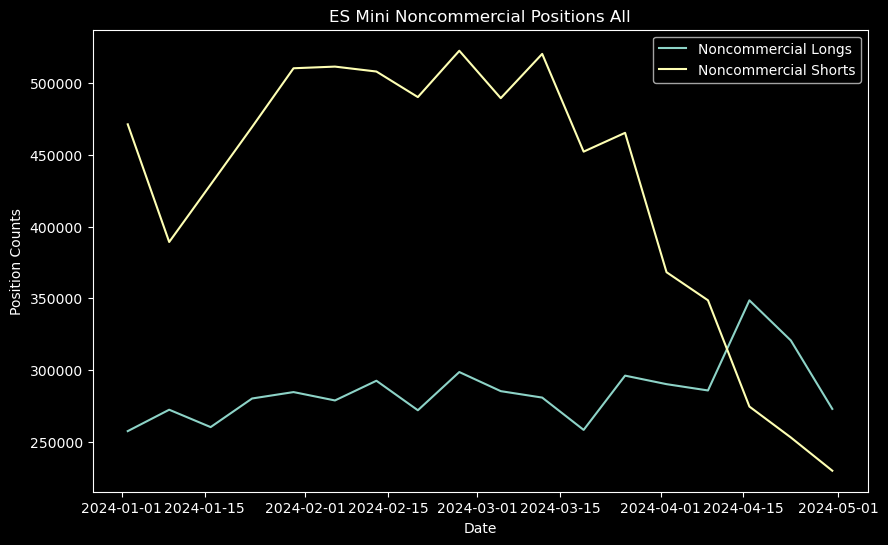

In [30]:
Es_mini["As of Date in Form YYYY-MM-DD"] = pd.to_datetime(Es_mini["As of Date in Form YYYY-MM-DD"])

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(Es_mini["As of Date in Form YYYY-MM-DD"], Es_mini["Noncommercial Positions-Long (All)"], label="Noncommercial Longs")
plt.plot(Es_mini["As of Date in Form YYYY-MM-DD"], Es_mini["Noncommercial Positions-Short (All)"], label="Noncommercial Shorts")

plt.title('ES Mini Noncommercial Positions All')
plt.xlabel('Date')
plt.ylabel('Position Counts')
plt.legend()
plt.grid(False)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_35324\3856121028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Es_mini["As of Date in Form YYYY-MM-DD"] = pd.to_datetime(Es_mini["As of Date in Form YYYY-MM-DD"])


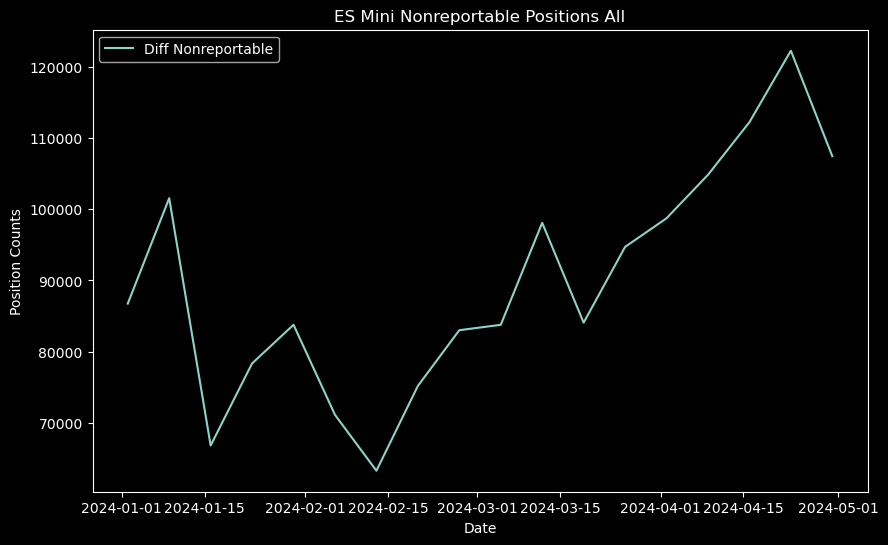

In [40]:
Es_mini["As of Date in Form YYYY-MM-DD"] = pd.to_datetime(Es_mini["As of Date in Form YYYY-MM-DD"])

# Plotting
plt.figure(figsize=(10, 6))


plt.plot(Es_mini["As of Date in Form YYYY-MM-DD"], Es_mini["Nonreportable Positions-Long (All)"] - Es_mini["Nonreportable Positions-Short (All)"], label="Diff Nonreportable")
plt.title('ES Mini Nonreportable Positions All')
plt.xlabel('Date')
plt.ylabel('Position Counts')
plt.legend()
plt.grid(False)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_35324\790024039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Nq_mini["As of Date in Form YYYY-MM-DD"] = pd.to_datetime(Nq_mini["As of Date in Form YYYY-MM-DD"])


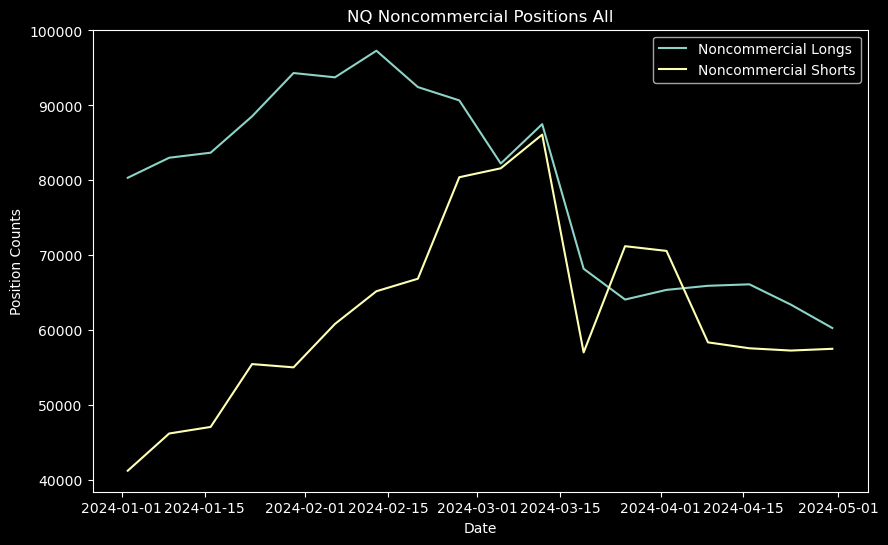

In [31]:
Nq_mini["As of Date in Form YYYY-MM-DD"] = pd.to_datetime(Nq_mini["As of Date in Form YYYY-MM-DD"])

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(Nq_mini["As of Date in Form YYYY-MM-DD"], Nq_mini["Noncommercial Positions-Long (All)"], label="Noncommercial Longs")
plt.plot(Nq_mini["As of Date in Form YYYY-MM-DD"], Nq_mini["Noncommercial Positions-Short (All)"], label="Noncommercial Shorts")

plt.title('NQ Noncommercial Positions All')
plt.xlabel('Date')
plt.ylabel('Position Counts')
plt.legend()
plt.grid(False)
plt.show()

In [32]:
from IPython.display import HTML

html_code = """
<div>
    <script class="powered" type="text/javascript"
            src="https://widgets.myfxbook.com/scripts/fxOutlook.js?type=0&symbols=,1,2,3,4,5,6,7,8,9,10,11,12,13,14,17,20,24,25,26,27,28,29,46,47,48,49,51,103,107"></script>
</div>
<div style="font-size: 10px">
<a href="https://www.myfxbook.com" title="" class="myfxbookLink" target="_self" rel="noopener">
            Powered by Myfxbook.com</a>
</div>

<script type="text/javascript">showOutlookWidget()</script>
"""

HTML(html_code)
